In [1]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras import layers, models
#from numpy.random import seed
#seed(1)
#import tensorflow
#tensorflow.random.set_seed(2)



In [2]:
# importing training data

data_path = "../Training/"
all_files = os.listdir(data_path)




from sklearn.model_selection import train_test_split


jpg_files = list(filter(lambda f: f.endswith('.jpg'), all_files))


# Split into training and validation sets
training_files, validation_files = train_test_split(jpg_files, test_size=0.2, random_state=42)






#Data size for training 
print("Training data size ",len(training_files))

# importing validation data

#validation_data_path = "Validation/"
#validation_files = os.listdir(validation_data_path)
#validation_files = list(filter(lambda f: f.endswith('.jpg'), validation_files))

#Data size for training 
print("Validation data size ",len(validation_files))


Training data size  3830
Validation data size  958


In [3]:
def ratios_to_categories(argument):
    switcher = {
        0:0.891,
        5:1.055,
        10:1.228,
        15:1.482,
        20:1.763,
        25:1.975,
        30:2.302,
        35:2.598,
        40:2.904,
        45:3.222,
        50:3.691,
        75:1.084,
        425:2.931,
        275:2.102
    }
    return switcher.get(argument, "nothing")


In [4]:
train_images = []
train_labels = []
val_images   = []
val_labels   = []
for trainingf_name in training_files:
    trainingratio = trainingf_name.split('-')[0]
    train_images.append(mpimg.imread(data_path +trainingf_name))
    train_labels.append(ratios_to_categories(int(trainingratio)))

for validationf_name in validation_files:
    validationratio = validationf_name.split('-')[0]
    #in case validation folder change data_path to validation data path
    val_images.append(mpimg.imread(data_path +validationf_name))
    val_labels.append(ratios_to_categories(int(validationratio)))
    
    


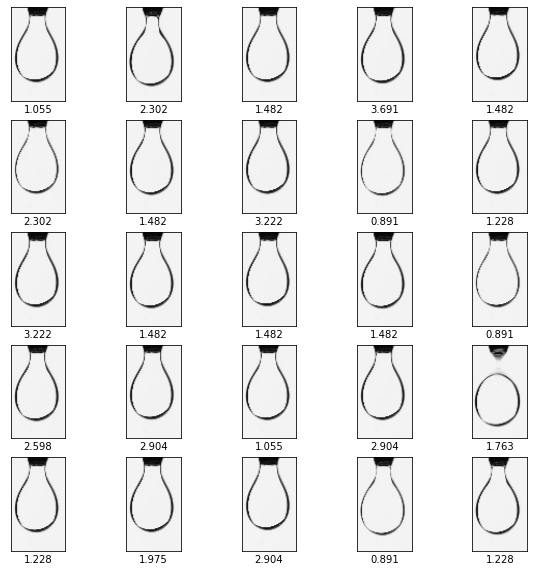

In [5]:
# Show the first 10 images

current=0
plt.figure(figsize=(10,10))

for i in range(25):

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()


In [7]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

        
#unique(train_labels)


In [8]:
image_height=91
image_width=53

train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images   = np.array(val_images)
val_labels   = np.array(val_labels)

print(train_images.shape)
print(val_images.shape)

#unique(val_labels)

(3830, 91, 53, 3)
(958, 91, 53, 3)


In [9]:
from itertools import groupby
print('Training labels occurances:',[len(list(group)) for key, group in groupby(sorted(train_labels))])

label_counts = [(key, len(list(group))) for key, group in groupby(sorted(train_labels))]
print('Training label occurrences:')
for label, count in label_counts:
    print("Viscosity "f'{label}: Number of Sample = {count}')

print('Validation Labels occurances:',[len(list(group)) for key, group in groupby(sorted(val_labels))])

label_counts = [(key, len(list(group))) for key, group in groupby(sorted(val_labels))]
print('Training label occurrences:')
for label, count in label_counts:
    print("Viscosity "f'{label}: Number of Sample = {count}')


Training labels occurances: [333, 352, 385, 367, 327, 351, 328, 345, 363, 335, 344]
Training label occurrences:
Viscosity 0.891: Number of Sample = 333
Viscosity 1.055: Number of Sample = 352
Viscosity 1.228: Number of Sample = 385
Viscosity 1.482: Number of Sample = 367
Viscosity 1.763: Number of Sample = 327
Viscosity 1.975: Number of Sample = 351
Viscosity 2.302: Number of Sample = 328
Viscosity 2.598: Number of Sample = 345
Viscosity 2.904: Number of Sample = 363
Viscosity 3.222: Number of Sample = 335
Viscosity 3.691: Number of Sample = 344
Validation Labels occurances: [104, 98, 88, 80, 67, 89, 65, 97, 77, 100, 93]
Training label occurrences:
Viscosity 0.891: Number of Sample = 104
Viscosity 1.055: Number of Sample = 98
Viscosity 1.228: Number of Sample = 88
Viscosity 1.482: Number of Sample = 80
Viscosity 1.763: Number of Sample = 67
Viscosity 1.975: Number of Sample = 89
Viscosity 2.302: Number of Sample = 65
Viscosity 2.598: Number of Sample = 97
Viscosity 2.904: Number of Sam

In [10]:
# Normalize pixel values between 0 and 1
train_images, val_images = train_images / 255.0, val_images / 255.0

In [11]:
from keras.applications import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load the MobileNet model with pre-trained weights (include_top=False means excluding the fully connected layers)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(91, 53, 3))

# Add custom layers on top of MobileNet
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='linear')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 91, 53, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 46, 27, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 46, 27, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 46, 27, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 46, 27, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 46, 27, 32)       128       
 ation)                                                      

                                                                 
 conv_pw_8 (Conv2D)          (None, 5, 3, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 5, 3, 512)        2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 5, 3, 512)         0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 5, 3, 512)        4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 5, 3, 512)        2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 5, 3, 512)         0         
                                                                 
 conv_pw_9

In [25]:

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

model.compile(optimizer='adam', loss='mse')

history =model.fit(train_images, train_labels, epochs=100,validation_data=(val_images, val_labels), callbacks=[early_stop])


Epoch 1/100
120/120 [==============================] - 57s 442ms/step - loss: 1.5982 - val_loss: 1.0531
Epoch 2/100
120/120 [==============================] - 54s 449ms/step - loss: 0.4893 - val_loss: 2.6347
Epoch 3/100
120/120 [==============================] - 52s 431ms/step - loss: 0.4676 - val_loss: 2.1519
Epoch 4/100
120/120 [==============================] - 54s 451ms/step - loss: 0.3567 - val_loss: 0.9940
Epoch 5/100
120/120 [==============================] - 55s 457ms/step - loss: 0.3032 - val_loss: 0.5343
Epoch 6/100
120/120 [==============================] - 51s 427ms/step - loss: 0.2801 - val_loss: 0.0929
Epoch 7/100
120/120 [==============================] - 56s 469ms/step - loss: 0.2643 - val_loss: 0.1297
Epoch 8/100
120/120 [==============================] - 56s 465ms/step - loss: 0.2372 - val_loss: 0.0301
Epoch 9/100
120/120 [==============================] - 63s 524ms/step - loss: 0.2059 - val_loss: 0.0745
Epoch 10/100
120/120 [==============================] - 59s 491m

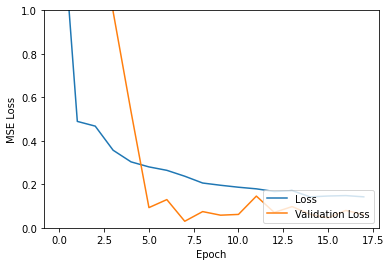

In [26]:
model.save('my_custom_mobilenet_model.h5')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [27]:

pred_train= model.predict(train_images)
scores = model.evaluate(train_images, train_labels, verbose=0)
print('Error on training data',scores)
pred_valid= model.predict(val_images)
scores1 = model.evaluate(val_images, val_labels, verbose=0)
print('Error on validation data,',scores1)




120/120 [==============================] - 7s 58ms/step
Error on training data 0.058997560292482376
30/30 [==============================] - 3s 85ms/step
Error on validation data, 0.06025085225701332


In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(train_labels, pred_train)
mse = mean_squared_error(train_labels, pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(train_labels, pred_train)

# Print the results
print("Training Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

Training Error Measurements
MAE: 0.20218121185613985
MSE: 0.058997568221876906
RMSE: 0.24289415024219274
R2 score: 0.9239816187025284


In [29]:

mae = mean_absolute_error(val_labels, pred_valid)
mse = mean_squared_error(val_labels, pred_valid)
rmse = np.sqrt(mse)
r2 = r2_score(val_labels, pred_valid)

# Print the results
print("Validataion Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)

Validataion Error Measurements
MAE: 0.20287478024028782
MSE: 0.060250857077086384
RMSE: 0.2454605000342955
R2 score: 0.9281423852267153


In [30]:
#TESTING ON SPECIFIC SAMPLES 0.257 , 0.425, 0.075 UNSEEN DATA 
testdata_path = "../Testing/"
alltest_files = os.listdir(testdata_path)
test_files = list(filter(lambda f: f.endswith('.jpg'), alltest_files))

#Data size for training 
len(test_files)


1286

In [31]:
testimages = []
test_images_labels = []
for testf_name in test_files:
    testratio = testf_name.split('-')[0]
    testimages.append(mpimg.imread(testdata_path +testf_name))
    test_images_labels.append(ratios_to_categories(int(testratio)))

from itertools import groupby
print([len(list(group)) for key, group in groupby(sorted(test_images_labels))])


# Normalize pixel values between 0 and 1
testimages = np.array(testimages) / 255.0

unique(test_images_labels)

label_counts = [(key, len(list(group))) for key, group in groupby(sorted(test_images_labels))]
print('Testing label occurrences:')
for label, count in label_counts:
    print("Viscosity "f'{label}: Number of Sample = {count}')


[425, 422, 439]
1.084
2.102
2.931
Testing label occurrences:
Viscosity 1.084: Number of Sample = 425
Viscosity 2.102: Number of Sample = 422
Viscosity 2.931: Number of Sample = 439


In [32]:
pred_test= model.predict(testimages)
#scores2 = model.evaluate(testimages, test_images_labels, verbose=0)

#print (pred_test)

#print('Error on validation data,',scores2)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate the evaluation metrics
mae = mean_absolute_error(test_images_labels, pred_test)
mse = mean_squared_error(test_images_labels, pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(test_images_labels, pred_test)

# Print the results
print("Testing Error Measurements")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)





41/41 [==============================] - 2s 55ms/step
Testing Error Measurements
MAE: 0.2870512381111667
MSE: 0.11999721464361185
RMSE: 0.3464061411747948
R2 score: 0.7910306643767754


In [33]:
total=0
count=0
#1.084:2.102:2.931
for i in range(len(pred_test)):
    #if(test_images_labels[i]==2.931):
    count+=1
    PercentError= (test_images_labels[i]-pred_test[i])/(test_images_labels[i])*100
    total=total+abs(PercentError)

print(count)
print("Prediction accuracy on Test Set :",100-total/len(pred_test))


1286
Prediction accuracy on Test Set : [86.33454]


In [34]:
total=0

for i in range(len(pred_test)):
    PercentError= (test_images_labels[i]-pred_test[i])/(test_images_labels[i])*100
    total=total+abs(PercentError)
print("Prediction accuracy on Test Set :",100-total/len(pred_test))

Prediction accuracy on Test Set : [86.33454]


In [35]:
total=0

for i in range(len(pred_train)):
    PercentError= (train_labels[i]-pred_train[i])/(train_labels[i])*100
    total=total+abs(PercentError)
print("Prediction accuracy on training Set :",100-total/len(pred_train))

Prediction accuracy on training Set : [89.53792]


In [36]:
total=0

for i in range(len(pred_valid)):
    PercentError= (val_labels[i]-pred_valid[i])/(val_labels[i])*100
    total=total+abs(PercentError)
print("Prediction accuracy on validation Set :",100-total/len(pred_valid))

Prediction accuracy on validation Set : [89.527176]


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


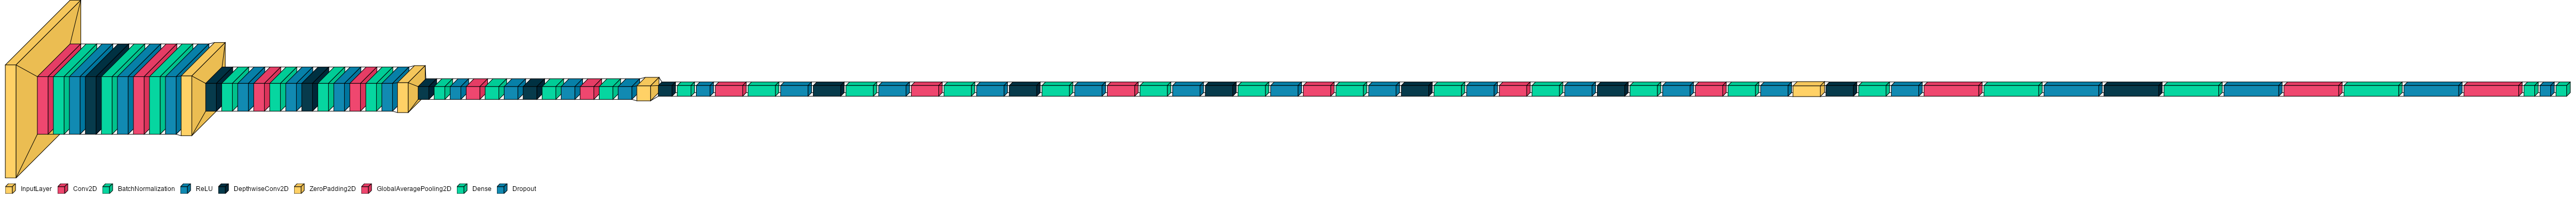

In [37]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
import visualkeras
visualkeras.layered_view(model)
visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(model, legend=True, font=font) # selected font

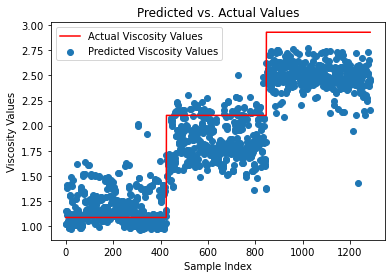

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a scatter plot for predicted values
plt.scatter(range(len(pred_test)), pred_test, label='Predicted Viscosity Values')
plt.plot(range(len(test_images_labels)), test_images_labels, c='red', label='Actual Viscosity Values')
plt.xlabel('Sample Index')
plt.ylabel('Viscosity Values')
plt.title('Predicted vs. Actual Values')


plt.legend()
plt.show()